Bài 1: 
Chọn ảnh quả kiwi bất kì .
Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới.
Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin.
Lưu ảnh kết quả vào file kiwi_wave.jpg


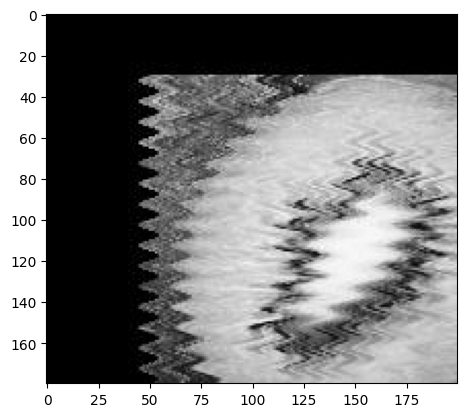

In [3]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('colorful-ripe-tropical-fruits.jpg', mode='F')
bmg = data[920:1100, 380:580]

kiwi_tinhtien = nd.shift(bmg, (30, 50)) 
def apply_wave_effect(image, amplitude=5, frequency=0.1):
    rows, cols = image.shape
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    x_wave = x + amplitude * np.sin(2 * np.pi * frequency * y)
    coordinates = np.array([y, x_wave]) 
    warped_image = nd.map_coordinates(image, coordinates, order=1, mode='reflect')
    
    return warped_image

kiwi_wave = apply_wave_effect(kiwi_tinhtien)

iio.imsave('kiwi_wave.jpg', kiwi_wave.astype(np.uint8))

kiwi_wave_img = iio.imread('kiwi_wave.jpg')
plt.imshow(kiwi_wave_img, cmap='gray')
plt.show()

Chọn quả đu đủ và dưa hấu từ google.
Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím.
Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.

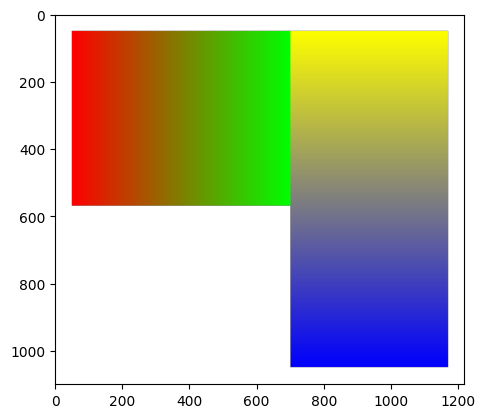

In [12]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
image = iio.imread('colorful-ripe-tropical-fruits.jpg')
papaya = image[300:820, 100:750].copy()
watermelon = image[200:1200, 1650:2500].copy()

# đỏ sang xanh lá gradient
h_papaya, w_papaya, _ = papaya.shape
gradient_papaya = np.linspace(0, 1, w_papaya).reshape(1, -1)  
gradient_papaya = np.tile(gradient_papaya, (h_papaya, 1))     

papaya_colored = np.zeros_like(papaya)
papaya_colored[:, :, 0] = (1 - gradient_papaya) * 255  
papaya_colored[:, :, 1] = gradient_papaya * 255        
papaya_colored[:, :, 2] = 0                            

# vàng sang tìm gradient
h_watermelon, w_watermelon, _ = watermelon.shape
gradient_watermelon = np.linspace(0, 1, h_watermelon).reshape(-1, 1)  
gradient_watermelon = np.tile(gradient_watermelon, (1, w_watermelon))  

watermelon_colored = np.zeros_like(watermelon)
watermelon_colored[:, :, 0] = (1 - gradient_watermelon) * 255         
watermelon_colored[:, :, 1] = (1 - gradient_watermelon) * 255       
watermelon_colored[:, :, 2] = gradient_watermelon * 255              
papaya_colored = papaya_colored.astype(np.uint8)
watermelon_colored = watermelon_colored.astype(np.uint8)
papaya_rgba = np.concatenate(
    [papaya_colored, np.full((h_papaya, w_papaya, 1), 255, dtype=np.uint8)],
    axis=2
)
watermelon_rgba = np.concatenate(
    [watermelon_colored, np.full((h_watermelon, w_watermelon, 1), 255, dtype=np.uint8)],
    axis=2
)
canvas_height = max(h_papaya, h_watermelon) + 100
canvas_width = w_papaya + w_watermelon + 100
canvas = np.zeros((canvas_height, canvas_width, 4), dtype=np.uint8)
canvas[50:50 + h_papaya, 50:50 + w_papaya, :] = papaya_rgba
x_offset = 50 + w_papaya
canvas[50:50 + h_watermelon, x_offset:x_offset + w_watermelon, :] = watermelon_rgba
iio.imwrite('dudu_duahau_gradient.png', canvas)
plt.imshow(canvas)
plt.show()


Bài 3: 

Chọn ảnh núi và thuyền .
Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False).
Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay.
Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

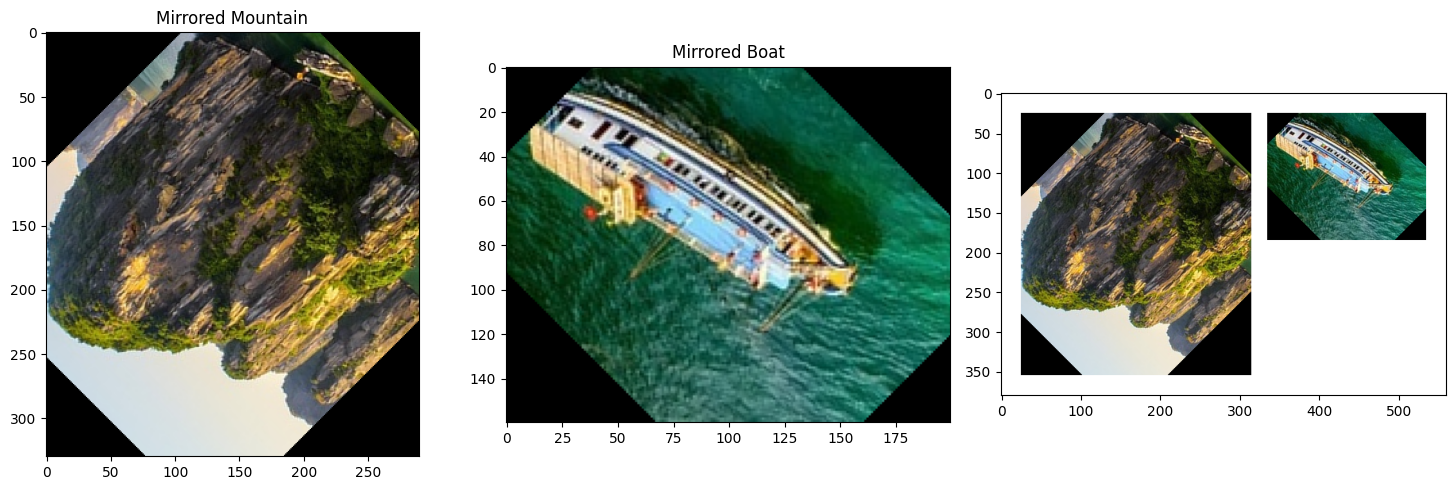

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

image = iio.imread('quang_ninh.jpg')
mountain = image[0:330, 410:700]
boat = image[420:580, 500:700]


rotated_mountain = nd.rotate(mountain, 45, reshape=False)
rotated_boat = nd.rotate(boat, 45, reshape=False)


mirrored_mountain = np.flipud(rotated_mountain)
mirrored_boat = np.flipud(rotated_boat)
canvas_height = max(mirrored_mountain.shape[0], mirrored_boat.shape[0]) + 50
canvas_width = mirrored_mountain.shape[1] + mirrored_boat.shape[1] + 70
canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255  # màu trắng
canvas[25:25 + mirrored_mountain.shape[0], 25:25 + mirrored_mountain.shape[1], :] = mirrored_mountain
x_offset = 25 + mirrored_mountain.shape[1] + 20
canvas[25:25 + mirrored_boat.shape[0], x_offset:x_offset + mirrored_boat.shape[1], :] = mirrored_boat
iio.imwrite('mountain_boat_mirror.jpg', canvas)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(mirrored_mountain)
axes[1].imshow(mirrored_boat)
axes[2].imshow(canvas)
plt.tight_layout()
plt.show()


Bài 4: 

Chọn ngôi chùa bất kì.
Phóng to ngôi chùa lên 5 lần.
Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa.
Lưu ảnh kết quả vào pagoda_warped.jpg.


/var/folders/9q/wj10sln56m73kzx0z89q33q80000gn/T/ipykernel_56959/3887933008.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = iio.imread('pagoda.jpg')


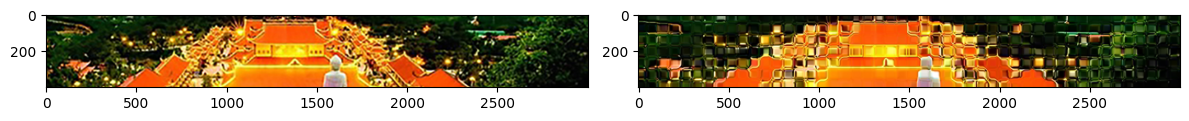

In [24]:
import numpy as np
import scipy.ndimage as nd
import imageio as iio
import matplotlib.pylab as plt

image = iio.imread('pagoda.jpg')
ngoi_chua = image[130:210, 0:600]
tang_kich_thuoc_chua = nd.zoom(ngoi_chua, (5, 5, 1))
iio.imsave('pagoda_zoom_5_lan.jpg', tang_kich_thuoc_chua)
def bien_doi_hinh_hoc(outcoord):

    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b
def biendoikenh(anh_goc):

    result = np.zeros_like(anh_goc)
    for k in range(3):
        result[..., k] = nd.geometric_transform(anh_goc[..., k], 
                                        bien_doi_hinh_hoc,
                                        output_shape=anh_goc.shape[:2])
    return result
uon_cong_chua = biendoikenh(tang_kich_thuoc_chua)
iio.imsave('pagoda_warped.jpg', uon_cong_chua)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(tang_kich_thuoc_chua)
plt.subplot(1, 2, 2)
plt.imshow(uon_cong_chua)
plt.tight_layout()
plt.show()

Tạo một chương trình menu tương tác cho phép người dùng chọn các phép biến đổi sau:
Tịnh tiến (hỏi số pixel di chuyển theo x và y).
Xoay (hỏi góc xoay và chọn reshape=True/False).
Phóng to/thu nhỏ (hỏi hệ số zoom).
Làm mờ Gaussian (hỏi giá trị sigma).
Biến đổi sóng (hỏi biên độ sóng).
Người dùng chọn ảnh từ 3 ảnh bất kì

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
import os

folder = 'exercise'
if not os.path.exists(folder):
    os.makedirs(folder)
    print(f"Đã tạo thư mục '{folder}'. Vui lòng thêm ảnh vào thư mục này.")
    exit()

def hien_thi_anh(img, title="Kết quả"):
    plt.imshow(img.astype(np.uint8))
    plt.title(title)
    plt.show()
    
def tinh_tien(img, shift_x=30, shift_y=30):
    return nd.shift(img, shift=(shift_y, shift_x, 0))

def xoay(img, angle=45, reshape=True):
    return nd.rotate(img, angle, reshape=reshape)

def phong_to_hoac_thu_nho(img, factor):
    return nd.zoom(img, (factor, factor, 1))

def lam_mo_gaussian(img, sigma=1):
    return nd.gaussian_filter(img, sigma=sigma)

def bien_doi_song(img, amplitude=5):
    rows, cols = img.shape[0], img.shape[1]
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    x_wave = x + amplitude * np.sin(2 * np.pi * y / 50)
    y_wave = y + amplitude * np.cos(2 * np.pi * x / 50)
    
    if img.ndim == 3:
        result = np.zeros_like(img)
        for k in range(3):
            result[..., k] = nd.map_coordinates(img[..., k], [y_wave.ravel(), x_wave.ravel()], order=1).reshape(rows, cols)
        return result
    else:
        return nd.map_coordinates(img, [y_wave.ravel(), x_wave.ravel()], order=1).reshape(rows, cols)

def coordinate_map(img):
    if img.ndim == 3:
        data = img.mean(axis=2) 
    else:
        data = img

    V, H = data.shape
    M = np.indices((V, H))
    d = 5
    q = 2 * d * np.random.ranf(M.shape) - d
    mp = (M + q).astype(int)
    mp[0] = np.clip(mp[0], 0, V - 1)
    mp[1] = np.clip(mp[1], 0, H - 1)
    d1 = nd.map_coordinates(data, mp)
    plt.imshow(d1, cmap='gray')
    plt.show()

while True:
    files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg'))]
    if not files:
        print(f"Không tìm thấy ảnh trong thư mục '{folder}'.")
        continue

    print("\nDANH SÁCH ẢNH TRONG THƯ MỤC:")
    for i, f in enumerate(files[:3]):
        print(f"{i+1}. {f}")

    try:
        index = int(input("Chọn số thứ tự ảnh (1-3): ")) - 1
        if index < 0 or index >= len(files[:3]):
            print("Vui lòng chọn từ 1-3")
            continue
    except ValueError:
        print("Vui lòng nhập số.")
        continue

    file_path = os.path.join(folder, files[index])
    img = iio.imread(file_path)

    print("\nMENU THAO TÁC:")
    print("1. Tịnh tiến ảnh")
    print("2. Xoay ảnh")
    print("3. Phóng to/Thu nhỏ")
    print("4. Làm mờ Gaussian")
    print("5. Biến đổi sóng")
    print("6. Coordinate Map")

    try:
        choice = input("Chọn thao tác (1-6): ").strip()
        
        if choice == '1':
            dx = int(input("Nhập giá trị tịnh tiến ngang (dx): "))
            dy = int(input("Nhập giá trị tịnh tiến dọc (dy): "))
            result = tinh_tien(img, dx, dy)
            hien_thi_anh(result, f"Tịnh tiến ({dx},{dy})")
            
        elif choice == '2':
            angle = float(input("Nhập góc xoay (độ): "))
            reshape = input("Tự động điều chỉnh kích thước? (y/n): ").lower() == 'y'
            result = xoay(img, angle, reshape)
            hien_thi_anh(result, f"Xoay {angle}°")
            
        elif choice == '3':
            factor = float(input("Nhập hệ số zoom: "))
            result = phong_to_hoac_thu_nho(img, factor)
            hien_thi_anh(result, f"Zoom {factor}x")
            
        elif choice == '4':
            sigma = float(input("Nhập độ mờ (sigma): "))
            result = lam_mo_gaussian(img, sigma)
            hien_thi_anh(result, f"Gaussian blur (σ={sigma})")
            
        elif choice == '5':
            amplitude = float(input("Nhập biên độ sóng: "))
            result = bien_doi_song(img, amplitude)
            hien_thi_anh(result, f"Sóng (A={amplitude})")
            
        elif choice == '6':
            coordinate_map(img)
            
        else:
            print("Vui lòng chọn từ 1-6")
            
    except ValueError:
        print("Giá trị nhập không hợp lệ!")
    except Exception as e:
        print(f"Có lỗi xảy ra: {str(e)}")


DANH SÁCH ẢNH TRONG THƯ MỤC:
1. ha-long-bay-in-vietnam.jpg
2. quang_ninh.jpg
3. pagoda.jpg
